In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

In [2]:
## load the data 
diabetesDF = pd.read_csv('Pima_Indian_diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 742 non-null float64
Glucose                     752 non-null float64
BloodPressure               768 non-null float64
SkinThickness               746 non-null float64
Insulin                     768 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         749 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Préparation des données

In [5]:
bad_g = diabetesDF["Glucose"] == 0
diabetesDF.loc[bad_g, "Glucose"] = None
sum(diabetesDF['Glucose']==0)

0

In [6]:
bad_g = diabetesDF['BloodPressure'] == 0
diabetesDF.loc[bad_g, 'BloodPressure'] = None
sum(diabetesDF['BloodPressure']==0)

0

In [7]:
bad_s= diabetesDF['Insulin'] == 0
diabetesDF.loc[bad_s, 'Insulin'] = None
sum(diabetesDF['Insulin']==0)

0

In [8]:
bad_s= diabetesDF['SkinThickness'] == 0
diabetesDF.loc[bad_s, 'SkinThickness'] = None
sum(diabetesDF['SkinThickness']==0)

0

In [9]:
bad_s= diabetesDF['BMI'] == 0
diabetesDF.loc[bad_s,'BMI'] = None
sum(diabetesDF['BMI']==0)

0

In [10]:
ad_s= diabetesDF['DiabetesPedigreeFunction'] == 0
diabetesDF.loc[bad_s,'DiabetesPedigreeFunction'] = None
sum(diabetesDF['DiabetesPedigreeFunction']==0)

0

In [11]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,747.000000,736.000000,531.000000,394.000000,747.000000,758.000000,749.000000,768.000000
mean,3.866601,120.769083,71.881125,28.533277,155.548223,32.135665,0.472215,33.761336,0.348958
std,3.479971,30.944811,13.352065,11.118489,118.775855,7.767358,0.329313,12.297409,0.476951
min,-5.412815,42.974768,-3.496455,-11.945520,14.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,76.250000,27.400000,0.244250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,190.000000,36.600000,0.626750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetesDF.shape

(768, 9)

In [13]:
diabetesDF.fillna(diabetesDF.mean(), inplace= True)
print(diabetesDF.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Visualisation de données

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


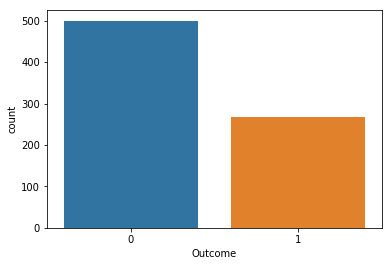

In [14]:
sns.countplot(diabetesDF['Outcome'],label="Count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e171268d0>,
      dtype=object)

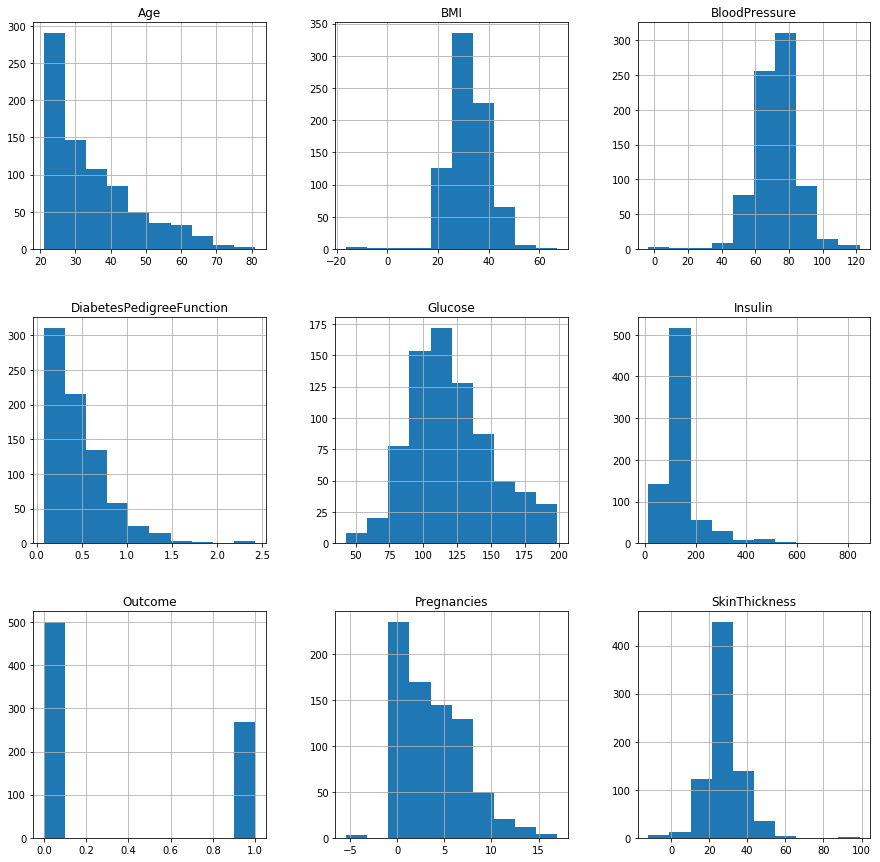

In [15]:
diabetesDF.hist(figsize=(15,15))

# Training and Evaluating Machine Learning Model

In [16]:
# split into train and test 
dfTrain =diabetesDF[:700]
dfTest = diabetesDF[700:750]
dfCheck=diabetesDF[750:]

In [17]:
# Séparation de l'étiquette et les fonctionnalités, pour les ensembles d'apprentissages et de test. 
# Conversion en tableau numpy cer les données seront gérés par l'algorithme d'apprentissage au format tableau numpy
trainLabel= np.asarray(dfTrain['Outcome'])
trainData=  np.asarray(dfTrain.drop('Outcome',1)) 
testLabel= np.asarray(dfTest['Outcome'])
testData=  np.asarray(dfTest.drop('Outcome',1))

In [18]:
# Normalisation des données
# Séparation de l'étiquette et les fonctionnalités, pour les ensembles d'apprentissages et de test. 
# Conversion en tableau numpy car les données seront gérées par l'algorithme d'apprentissage au format tableau numpy

means= np.mean(trainData, axis=0)
stds= np.std(trainData, axis=0)

trainData= (trainData - means)/stds
testData= (testData - means)/stds

In [19]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  82.0 %


Text(0.5,0,'Importance')

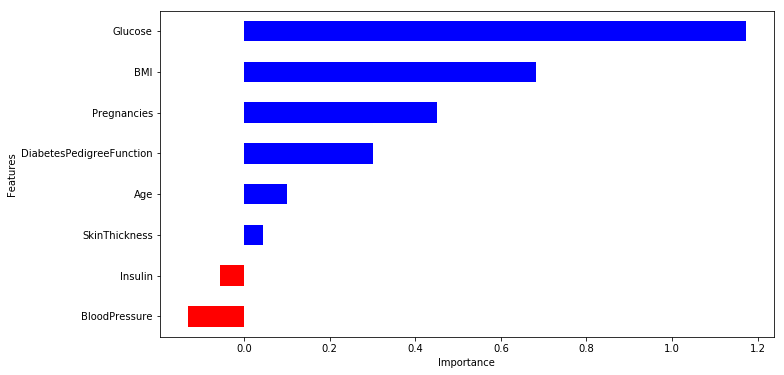

In [21]:
coeff = list(diabetesCheck.coef_[0])
labels = list(dfTrain.drop('Outcome',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [22]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [23]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  82.0 %


In [24]:
sampleData = dfCheck[:1]
 
# prepare sample  
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
 
# predict 
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.43221851 0.56778149]]
prediction: [1]
